# 一、TF-IDF原理

## 问题：
假设文本集中有100篇文章，其中一篇文本中出现“喜欢”的次数是3，这篇文章的总词汇数是1000。在这100篇文章中有20篇文章出现过“喜欢”。现在需要求“喜欢”在这篇文章中的权重。

### TF-IDF解释
TF-IDF（term frequency–inverse document frequency）是一种用于信息检索与数据挖掘的常用加权技术。TF意思是词频(Term Frequency)，IDF意思是逆文本频率指数(Inverse Document Frequency)。

### 词频原理
词频（term frequency，TF）指的是某一个给定的词语在该文件中出现的频率。这个数字是对词数(term count)的归一化，以防止它偏向长的文件。

### 逆文档频率原理
逆向文件频率（inverse document frequency，IDF）是一个词语普遍重要性的度量。某一特定词语的IDF，可以由总文件数目除以包含该词语之文件的数目，再将得到的商取以10为底的对数得到。

## 答案：
* TF = 3/1000 = 0.003
* IDF = log(100/20) = log5
* TF-IDF = TF*IDF = 0.003 *log5

# 二、文本矩阵化

## scikit-learn接口
from sklearn.feature_extraction.text import TfidfTransformer

vectorizer = TfidfVectorizer(ngram_range=(1, 2), min_df=3, max_df=0.9, sublinear_tf=True)

vectorizer.fit(df_all)

x_train = vectorizer.transform(df_all)


# 三、互信息的原理

两个离散随机变量 X 和 Y 的互信息可以定义为：
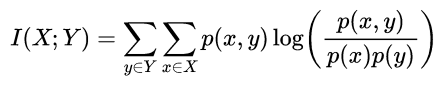
其中 p(x,y) 是 X 和 Y 的联合概率分布函数，而p(x)和p(y)分别是 X 和 Y 的边缘概率分布函数。
互信息量I(xi;yj)在联合概率空间P(XY)中的统计平均值。 平均互信息I(X;Y)克服了互信息量I(xi;yj)的随机性,成为一个确定的量。如果对数以 2 为基底，互信息的单位是bit。

直观上，互信息度量 X 和 Y 共享的信息：它度量知道这两个变量其中一个，对另一个不确定度减少的程度。例如，如果 X 和 Y 相互独立，则知道 X 不对 Y 提供任何信息，反之亦然，所以它们的互信息为零。在另一个极端，如果 X 是 Y 的一个确定性函数，且 Y 也是 X 的一个确定性函数，那么传递的所有信息被 X 和 Y 共享：知道 X 决定 Y 的值，反之亦然。因此，在此情形互信息与 Y（或 X）单独包含的不确定度相同，称作 Y（或 X）的熵。而且，这个互信息与 X 的熵和 Y 的熵相同。（这种情形的一个非常特殊的情况是当 X 和 Y 为相同随机变量时）
　　互信息又可以等价地表示成：
　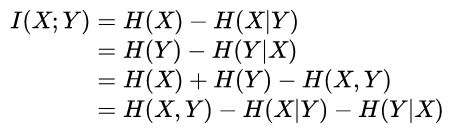
　其中H(X)和H(Y) 是边缘熵，H(X|Y)和H(Y|X)是条件熵，而H(X,Y)是X和Y的联合熵。注意到这组关系和并集、差集和交集的关系类似，用Venn图表示：
 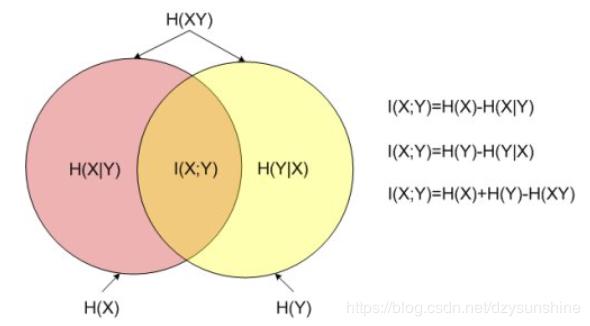

# 四、使用第二步生成的特征矩阵，利用互信息进行特征筛选

from sklearn.feature_selection import SelectKBest

from sklearn.feature_selection import mutual_info_classif

arr = SelectKBest(mutual_info_classif, k=2).fit_transform(df_all, label)